#assignment

In [1]:
#The required packages are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<b>Load and preprocess Data<b>

In [2]:
#The dataset is loaded
df = pd.read_csv('PCA_practice_dataset.csv')
df.head()
X = df.to_numpy() #The data is converted to numpy
X.shape

(8041, 35)

In [3]:
#We need to scale the data with mean = 0 and standard deviation = 1 before applying PCA
scalar = StandardScaler()
X = scalar.fit_transform(X)

<b>Applying PCA<b>

In [4]:
#Applying PCA
pca = PCA()
X = pca.fit_transform(X)

In [6]:
#Getting a sum of all the eigen values for the corresponding eigen vectors
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)*100

In [7]:
#Declaring a list of the desired thresholds
thresholds = [i for i in range(90,97+1,1)]

In [8]:
#Making a list of the components required to retain the varience as mentioned in our required threshold list
components = [np.argmax(cumulative_variance>threshold)for threshold in thresholds]

for component, threshold in zip(components, thresholds):
    print("Components required for {}% threshold are : {}".format(threshold,component))

Components required for 90% threshold are : 2
Components required for 91% threshold are : 2
Components required for 92% threshold are : 3
Components required for 93% threshold are : 3
Components required for 94% threshold are : 4
Components required for 95% threshold are : 4
Components required for 96% threshold are : 5
Components required for 97% threshold are : 6


<b>Scree plot<b>

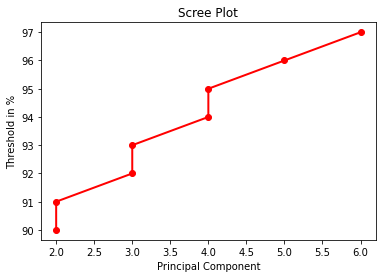

In [10]:
#Plotting these data in the form of a scree plot
plt.plot(components, range(90,97+1,1), 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Threshold in %')
plt.show()

<b>Dimensionality reduction<b>

In [11]:
#Performing dimensionality reduction
X_orig = X

for component,var in zip(components,thresholds):
    pca = PCA(n_components = component) #Passing the number of components required for each threshold
    X_transformed = pca.fit_transform(X_orig)  #We get the reduced dimensionality dataset
    print('Performing dimensionality reduction to retain {}% threshold'.format(var))
    print('After dimensionality reduction, the new shape to the dataset is :',X_transformed.shape)
    print('\n')

Performing dimensionality reduction to retain 90% threshold
After dimensionality reduction, the new shape to the dataset is : (8041, 2)


Performing dimensionality reduction to retain 91% threshold
After dimensionality reduction, the new shape to the dataset is : (8041, 2)


Performing dimensionality reduction to retain 92% threshold
After dimensionality reduction, the new shape to the dataset is : (8041, 3)


Performing dimensionality reduction to retain 93% threshold
After dimensionality reduction, the new shape to the dataset is : (8041, 3)


Performing dimensionality reduction to retain 94% threshold
After dimensionality reduction, the new shape to the dataset is : (8041, 4)


Performing dimensionality reduction to retain 95% threshold
After dimensionality reduction, the new shape to the dataset is : (8041, 4)


Performing dimensionality reduction to retain 96% threshold
After dimensionality reduction, the new shape to the dataset is : (8041, 5)


Performing dimensionality reductio